<a href="https://colab.research.google.com/github/anthonyrueckert/FantasyFootballMachineLearning/blob/main/MachineLearning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/11-Machine%20Learning%20-%20Clustering/1-Fantasy%20Pros%20ECR%20Rankings%20-%20PPR.csv').dropna()

num_teams = 12
num_roster_spots = 16

draft_pool = num_teams*num_roster_spots

df = df[:draft_pool]

print(df.shape)
df.head()

(192, 7)


,RK,Player,Team,Position,AVG,Min,Max
0,1,Christian McCaffrey,CAR,RB,1.2,1.0,2.0
1,2,Jonathan Taylor,IND,RB,2.0,1.0,3.0
2,3,Austin Ekeler,LAC,RB,4.4,2.0,7.0
3,4,Dalvin Cook,MIN,RB,5.4,4.0,7.0
4,5,Justin Jefferson,MIN,WR,6.0,3.0,10.0


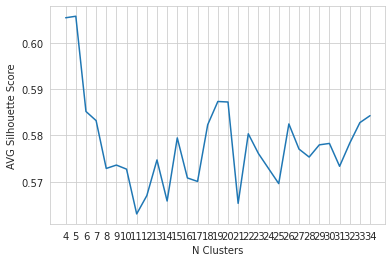

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

avgs = []

start = 4
stop = 34+1

#finding n clusters with lowest average silhouette score

for n_clusters in range(start,stop):
  X = df[['AVG']].values

  model = KMeans(n_clusters = n_clusters)
  model.fit(X)
  labels = model.predict(X)
  silhouette_avg = silhouette_score(X, labels)
  avgs.append(silhouette_avg)

#plotting result

plt.plot(np.arange(start, stop, 1), avgs);
plt.xlabel('N Clusters');
plt.ylabel('AVG Silhouette Score')

plt.xticks(np.arange(start,stop,1));



In [ ]:
pd.set_option('display.max_rows', None)

k = 15

model = KMeans(n_clusters = k)

model.fit(X)

labels = model.predict(X)

def assign_tiers(labels):
  unique_labels = []
  tiers = []

  for i in labels:
    if i not in unique_labels:
      unique_labels.append(i)
    
    tiers.append(len(set(unique_labels)))

  return tiers

tiers = assign_tiers(labels)

df['Tier'] = tiers

df.set_index('Tier').head(190)

,RK,Player,Team,Position,AVG,Min,Max
Tier,,,,,,,
1,1,Christian McCaffrey,CAR,RB,1.2,1.0,2.0
1,2,Jonathan Taylor,IND,RB,2.0,1.0,3.0
1,3,Austin Ekeler,LAC,RB,4.4,2.0,7.0
1,4,Dalvin Cook,MIN,RB,5.4,4.0,7.0
1,5,Justin Jefferson,MIN,WR,6.0,3.0,10.0
1,6,Cooper Kupp,LAR,WR,7.0,3.0,10.0
1,7,Najee Harris,PIT,RB,8.6,4.0,12.0
1,8,Ja'Marr Chase,CIN,WR,8.8,4.0,11.0
1,9,D'Andre Swift,DET,RB,9.4,5.0,12.0
